In [4]:
!nvidia-smi

Sun Apr  6 10:49:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install ultralytics
from IPython import display
display.clear_output()
!yolo mode = checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 920, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'predict', 'track', 'val', 'train', 'benchmark', 'export'}).

    Arguments received: ['yolo', 'mode', '=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MO

In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
import os
Home = os.getcwd()
print(Home)

/content


In [12]:
%cd {Home}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="erV2E3DEMbh7bFNlY7Et")
project = rf.workspace("dentex").project("dentex-3xe7e")
version = project.version(2)
dataset = version.download("yolov8")


/content
loading Roboflow workspace...
loading Roboflow project...


In [13]:
%cd {Home}
!yolo task = detect mode = train model = yolov8n.pt data = {dataset.location}/data.yaml epochs = 50 imgsz = 640

/content
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dentex-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

In [21]:
!ls {Home}/runs/detect/train/

args.yaml					    labels.jpg	      train_batch2.jpg
events.out.tfevents.1743936732.4e28182f4883.1226.0  train_batch0.jpg  weights
labels_correlogram.jpg				    train_batch1.jpg


/content


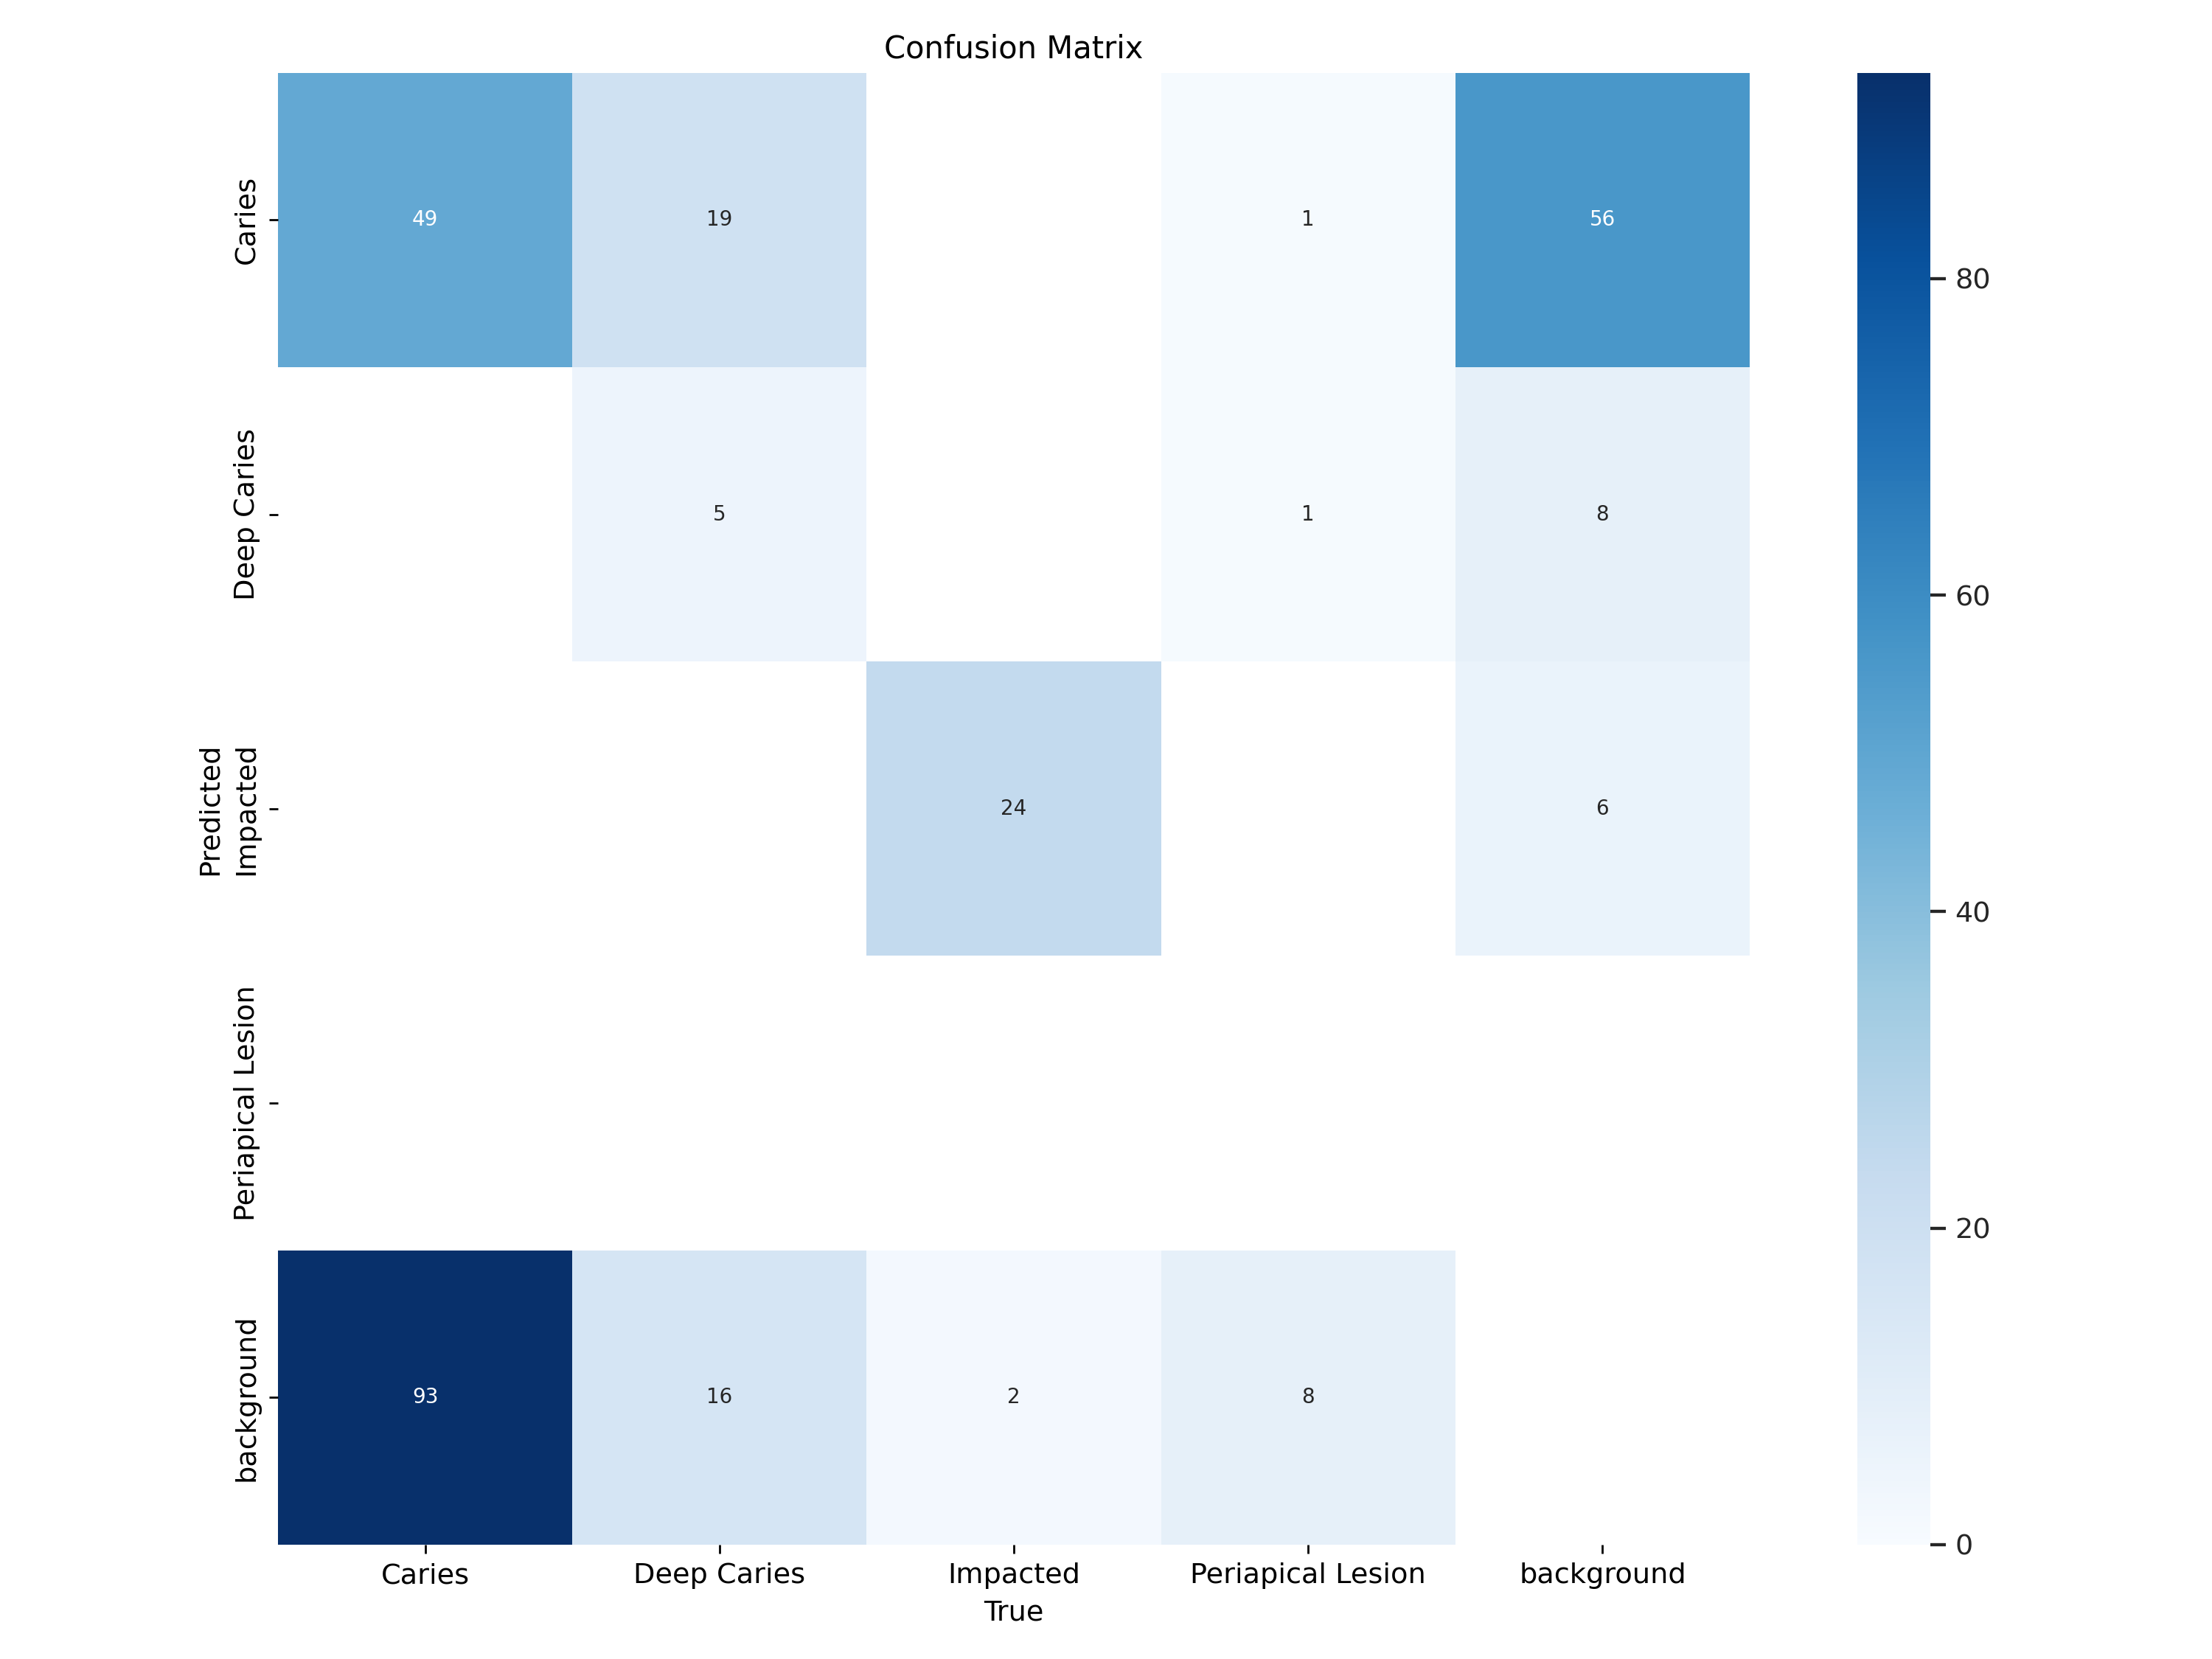

In [24]:
%cd {Home}
Image(filename =f'{Home}/runs/detect/train2/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '= /content'
/content


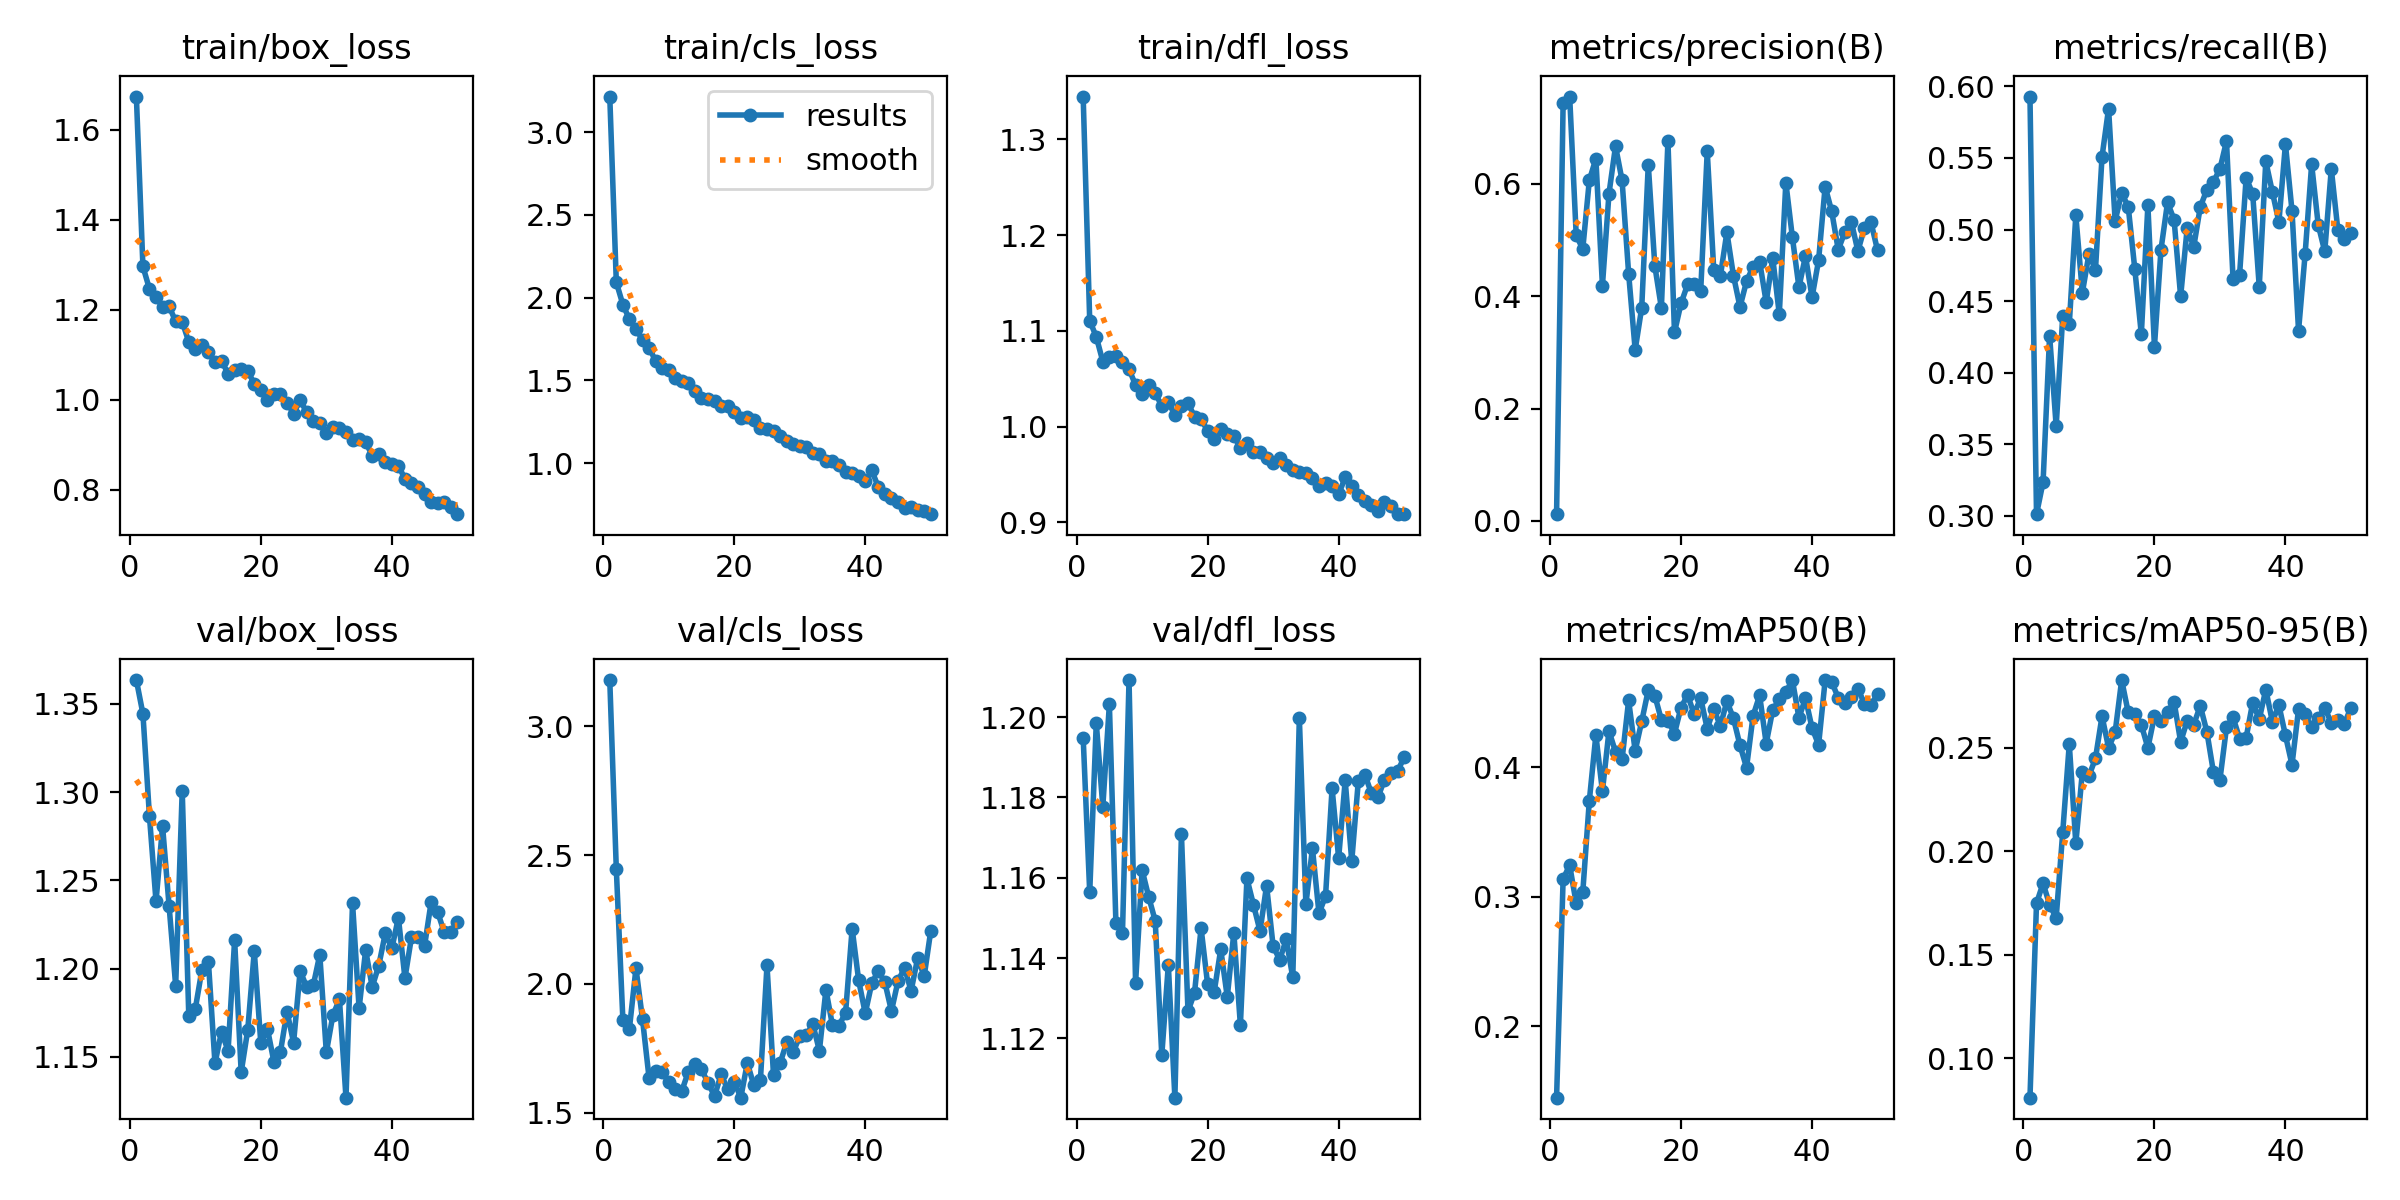

In [26]:
%cd = {Home}
Image(filename = 'runs/detect/train2/results.png', width=600)

/content


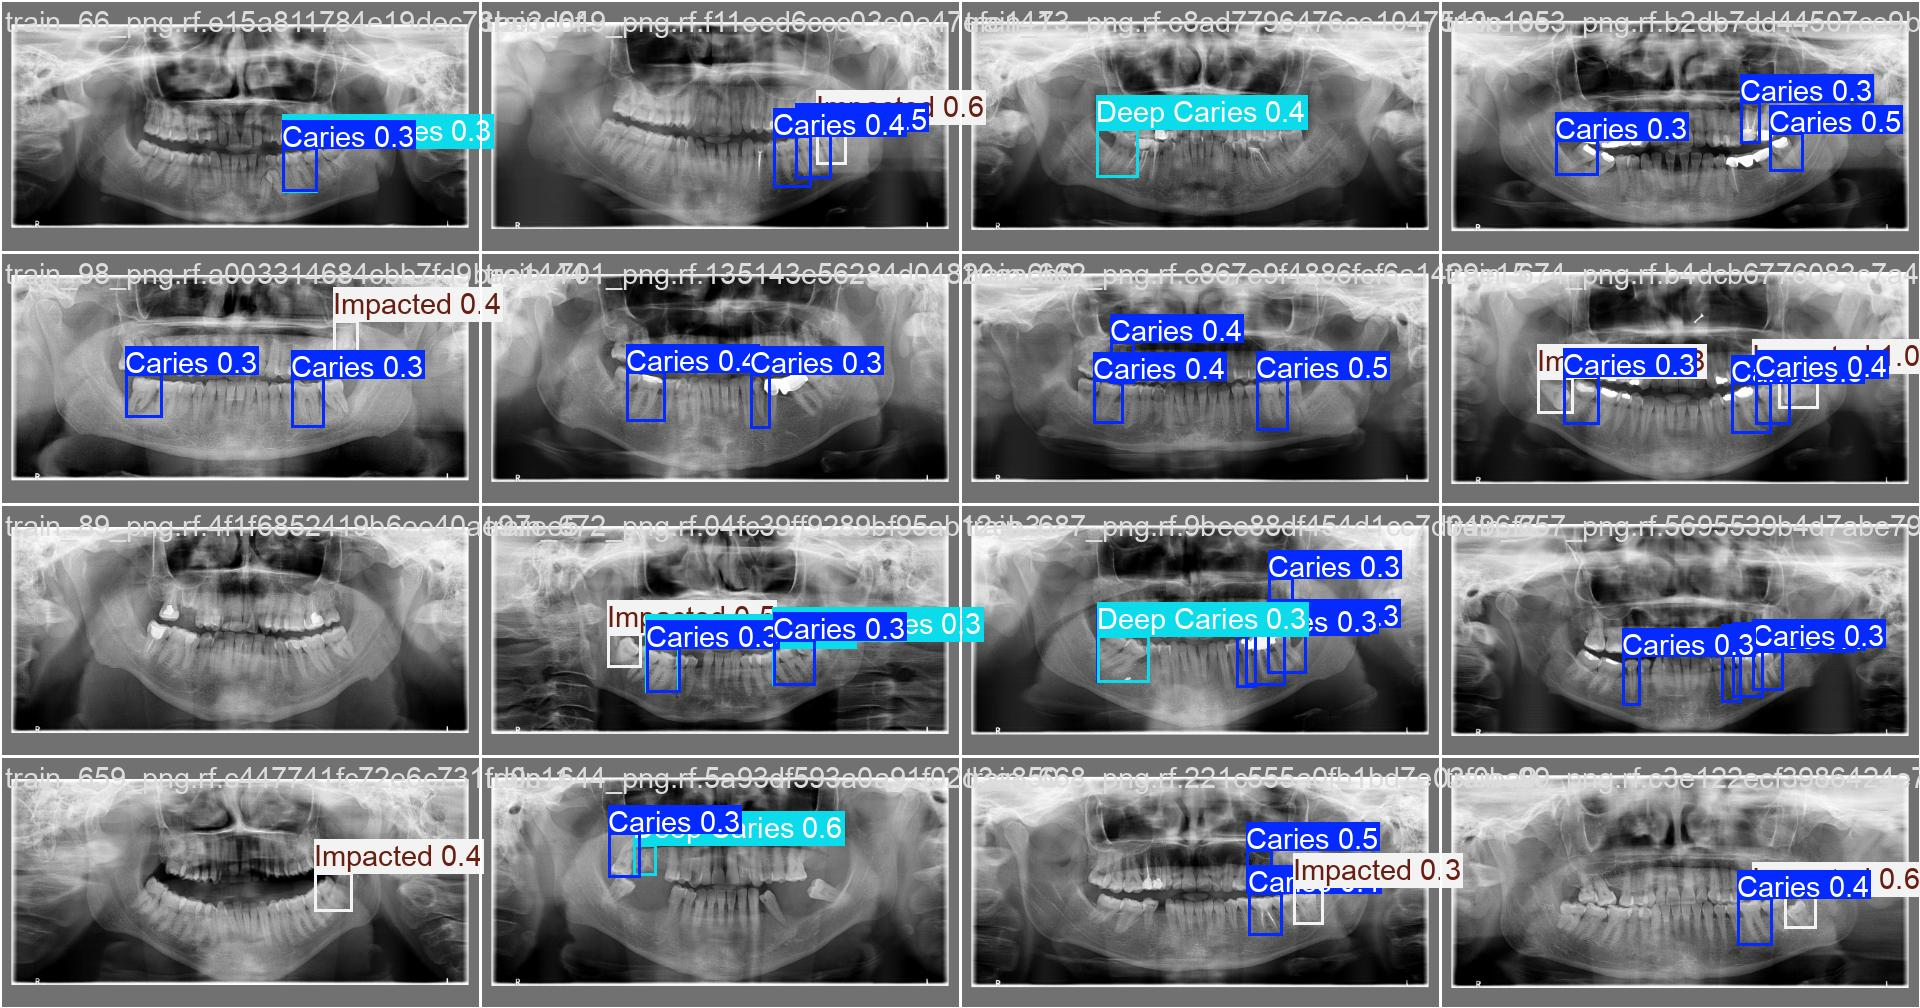

In [28]:
%cd {Home}
Image(filename = 'runs/detect/train2/val_batch0_pred.jpg', width=600)

In [30]:
%cd {Home}
!yolo task = detect mode = val model = {Home}/runs/detect/train2/weights/best.pt data = {dataset.location}/data.yaml

/content
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/dentex-2/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.39it/s]
                   all         40        218      0.638      0.527      0.472      0.289
                Caries         38        142      0.306      0.634      0.349      0.243
           Deep Caries         23         40      0.533      0.475      0.489      0.302
              Impacted         11         26      0.714          1      0.913      0.571
     Periapical Lesion          6         10          1          0      0.136     0.0408
Speed: 5.7ms preprocess, 14.5ms inference, 0.0ms loss, 12.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https:/

In [31]:
%cd {Home}
!yolo task = detect mode = predict model = {Home}/runs/detect/train2/weights/best.pt conf = 0.25 source = {dataset.location}/test/images

/content
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

image 1/165 /content/dentex-2/test/images/train_49_png.rf.56c1159720608fdc7726fe61b4ceeba6.jpg: 320x640 11 Cariess, 1 Impacted, 62.1ms
image 2/165 /content/dentex-2/test/images/train_506_png.rf.c618b47c2f4f6e2c9892a11c1a5ba013.jpg: 320x640 2 Cariess, 4 Impacteds, 8.9ms
image 3/165 /content/dentex-2/test/images/train_513_png.rf.f2afbc9f3f074423fd7edc7153fa78f9.jpg: 320x640 4 Cariess, 1 Deep Caries, 8.6ms
image 4/165 /content/dentex-2/test/images/train_521_png.rf.c1b44a0157875d6cb701bdff0561f41d.jpg: 288x640 2 Cariess, 70.3ms
image 5/165 /content/dentex-2/test/images/train_523_png.rf.b992ed605c89b7cd947c60fabeab7b8b.jpg: 288x640 5 Cariess, 11.6ms
image 6/165 /content/dentex-2/test/images/train_540_png.rf.c757cb112bc07f7d49d7148dc532b54a.jpg: 320x640 5 Cariess, 1 Deep Caries, 1 Impacted, 13.5ms
image 7/165 /content/den

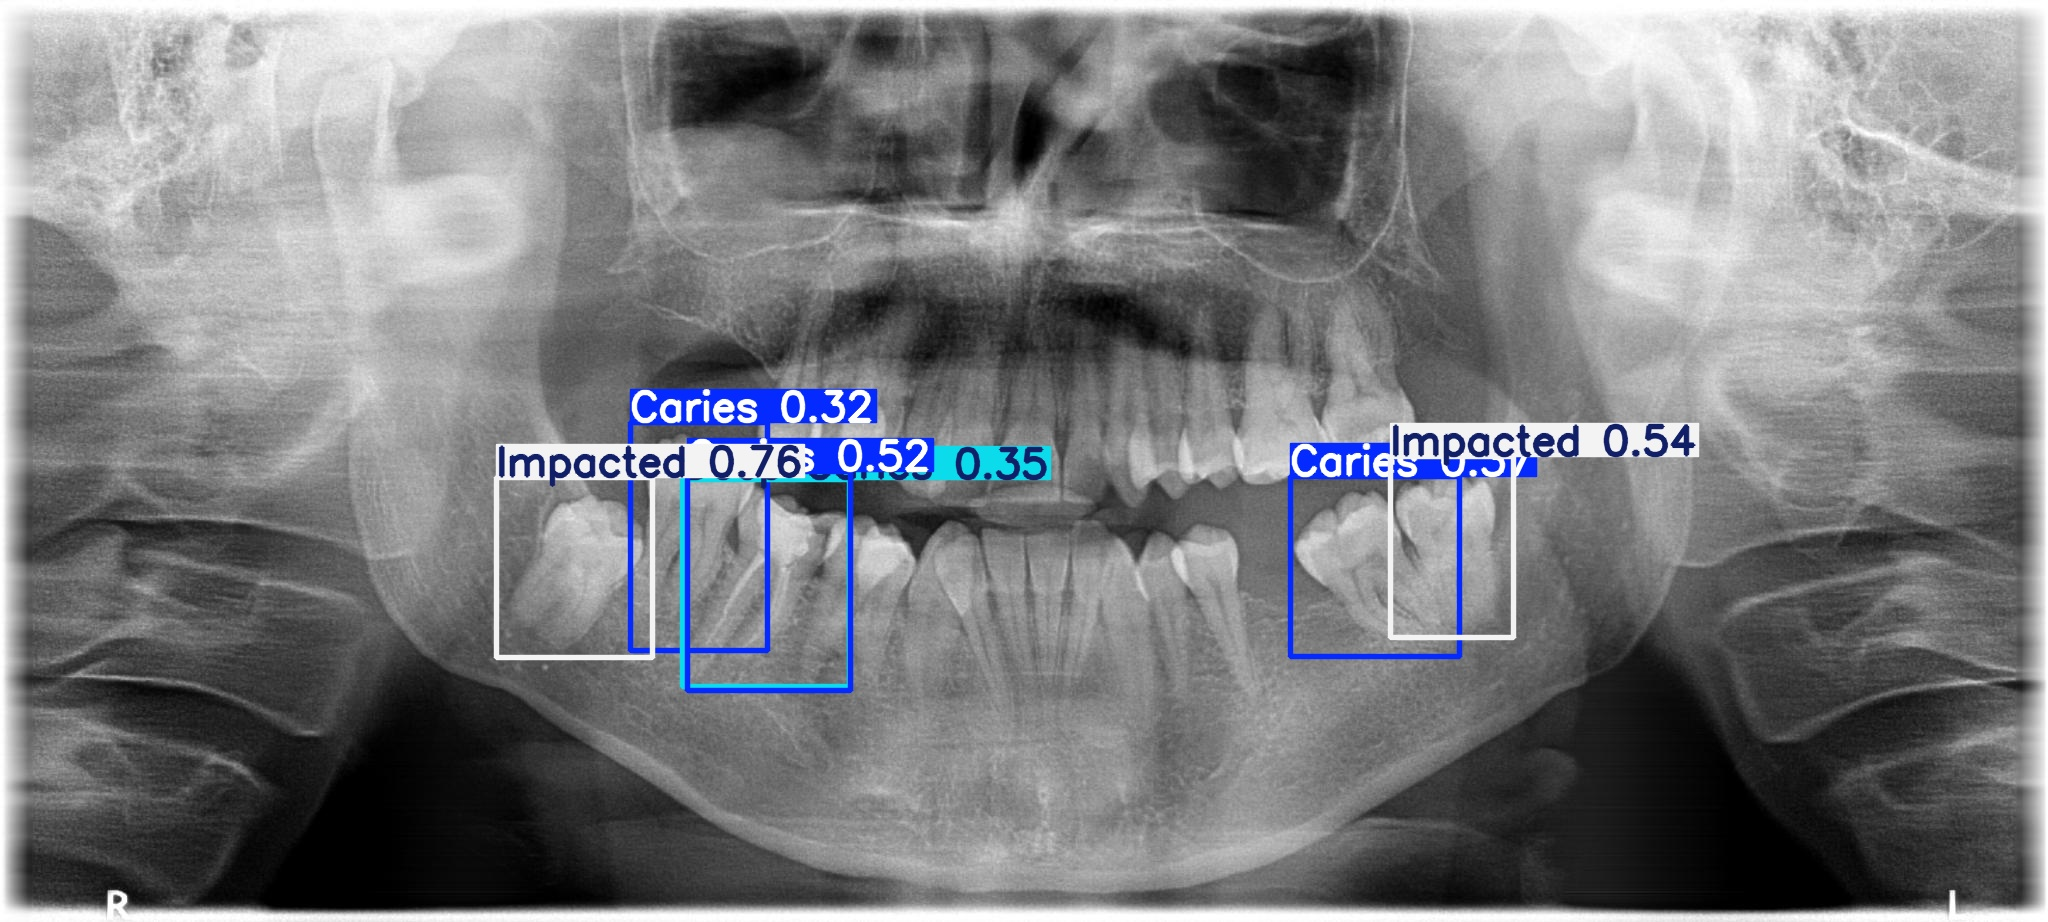

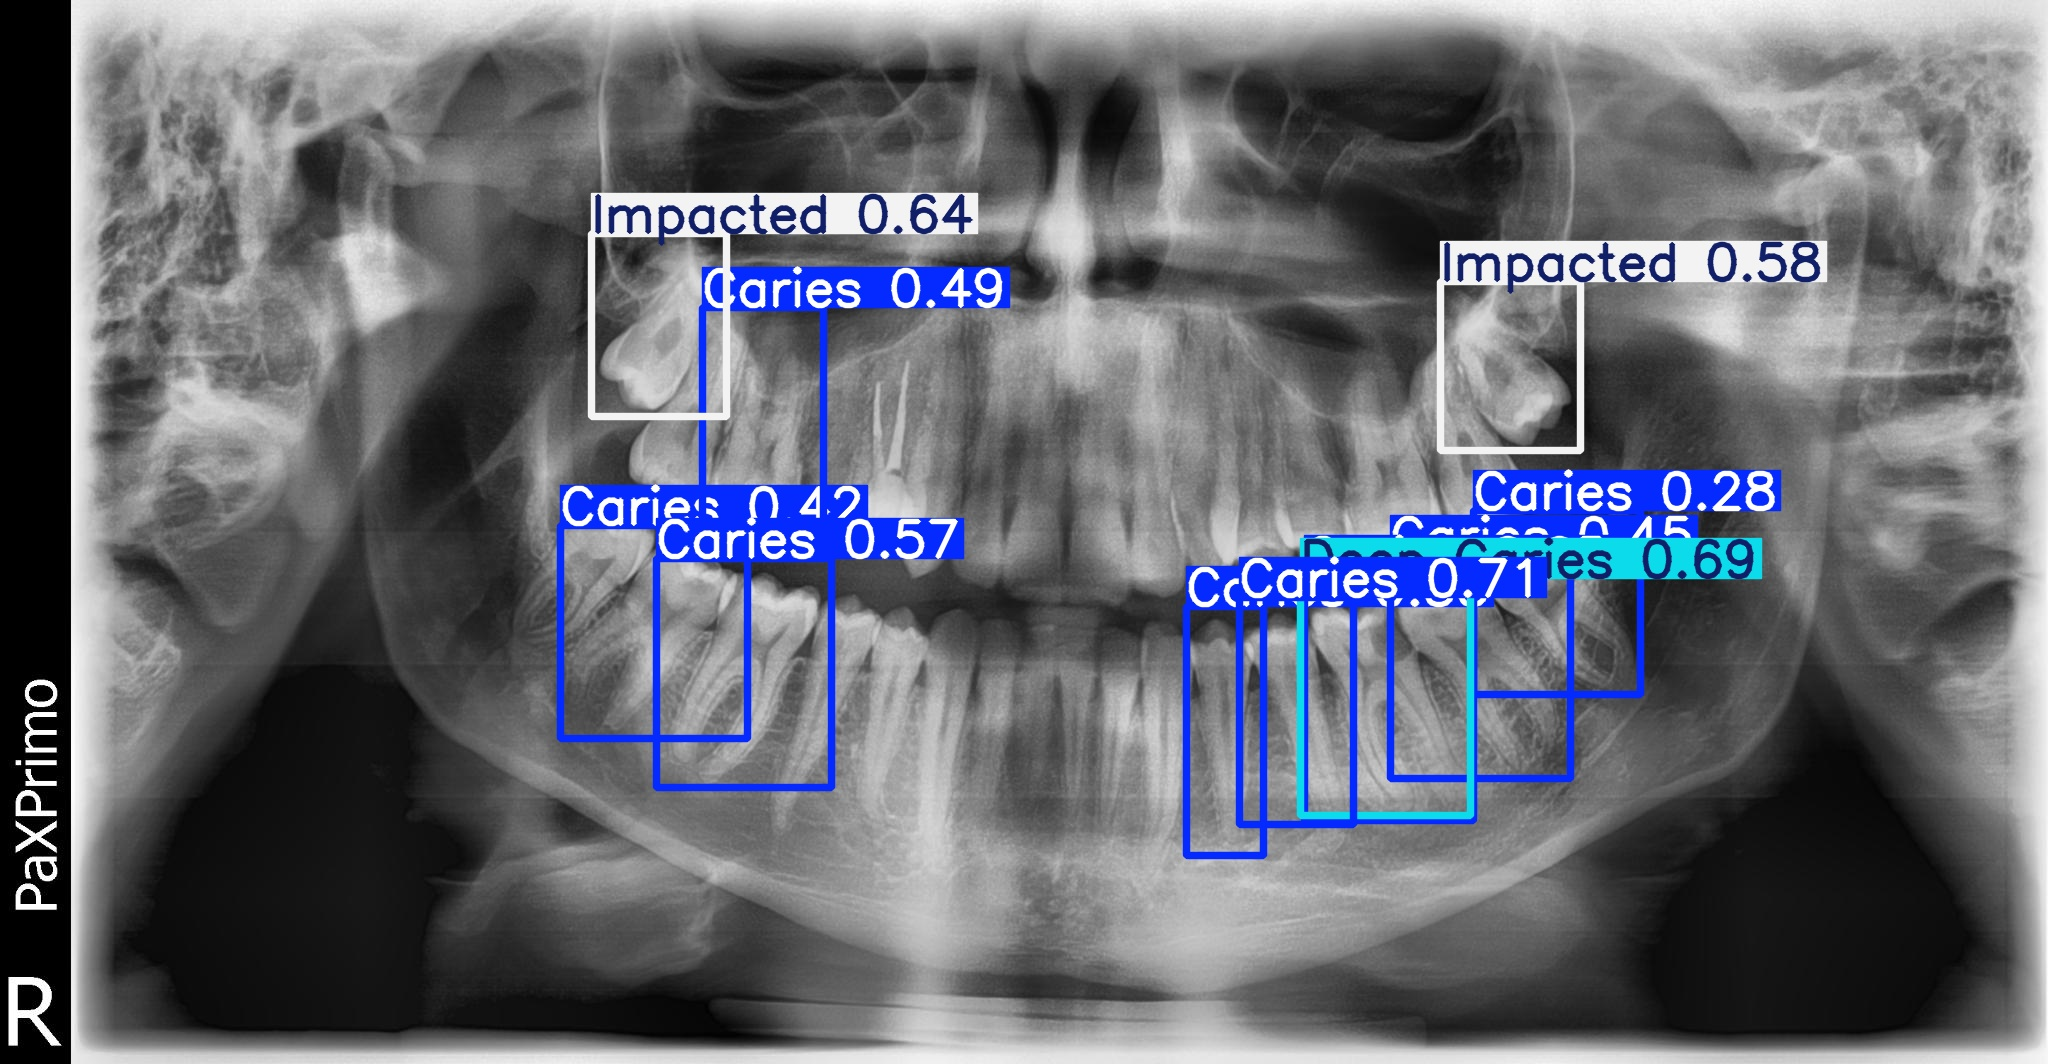

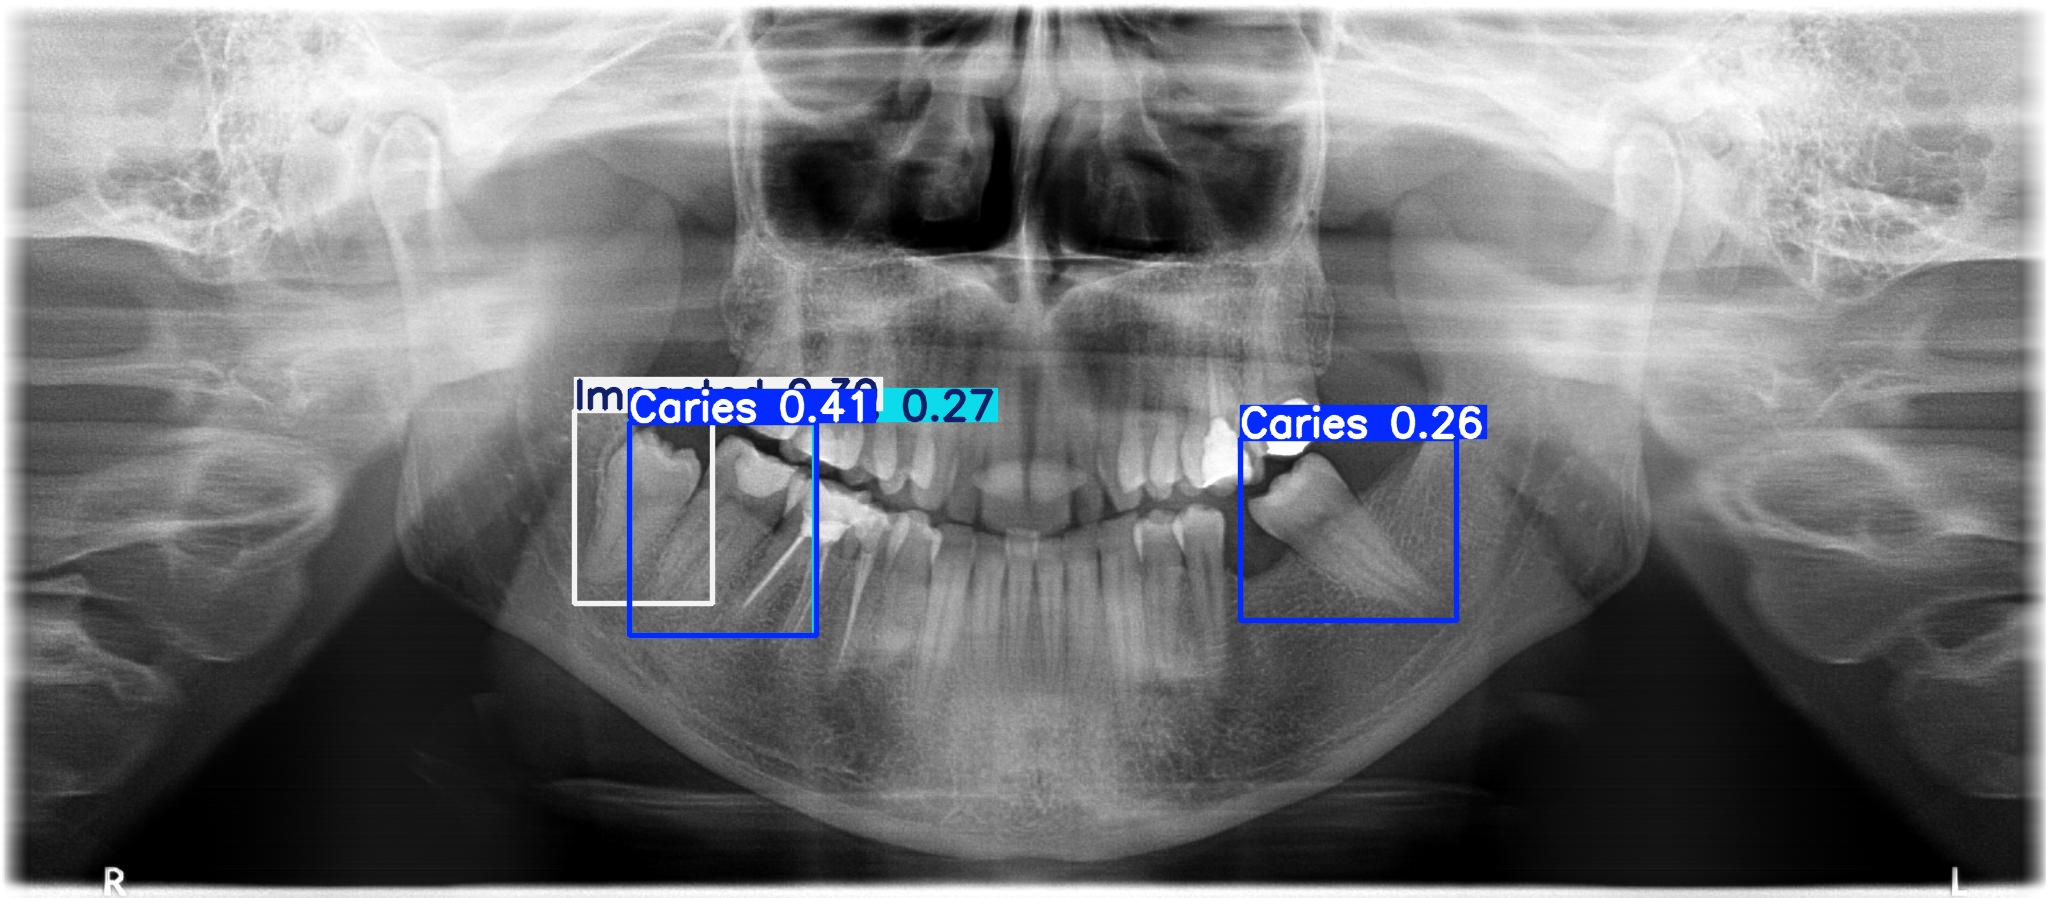

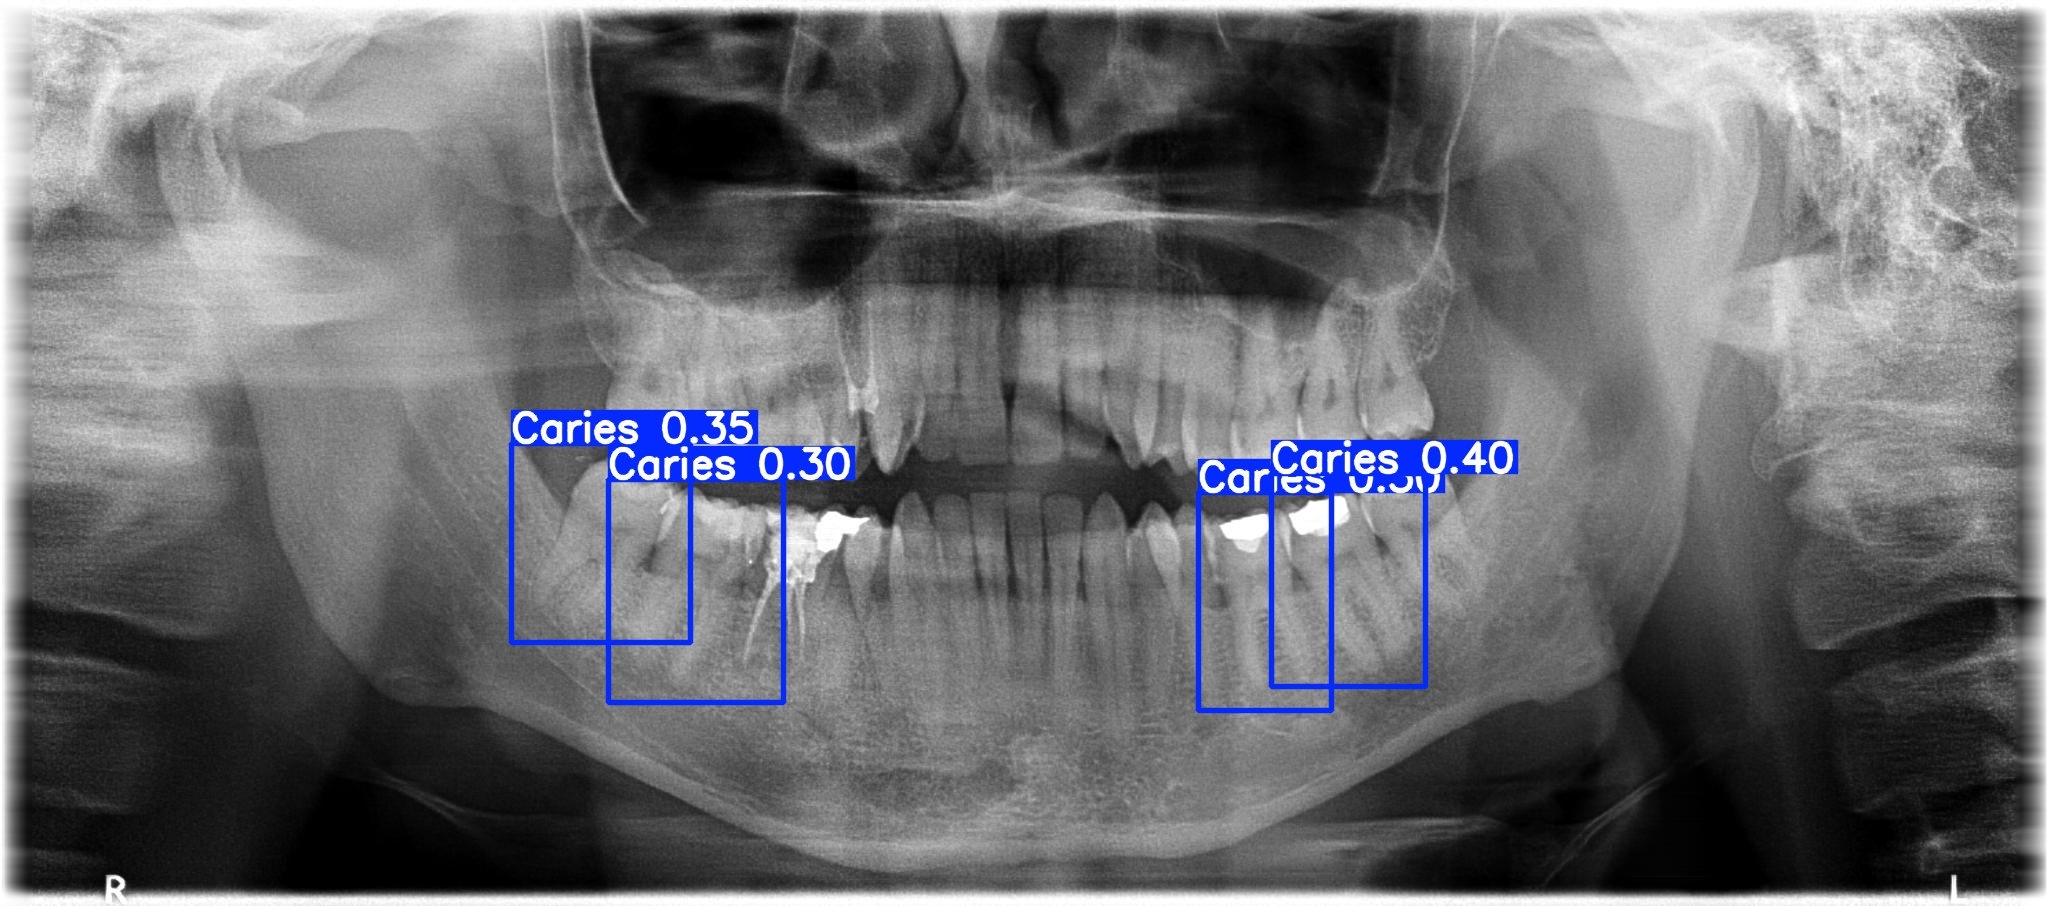

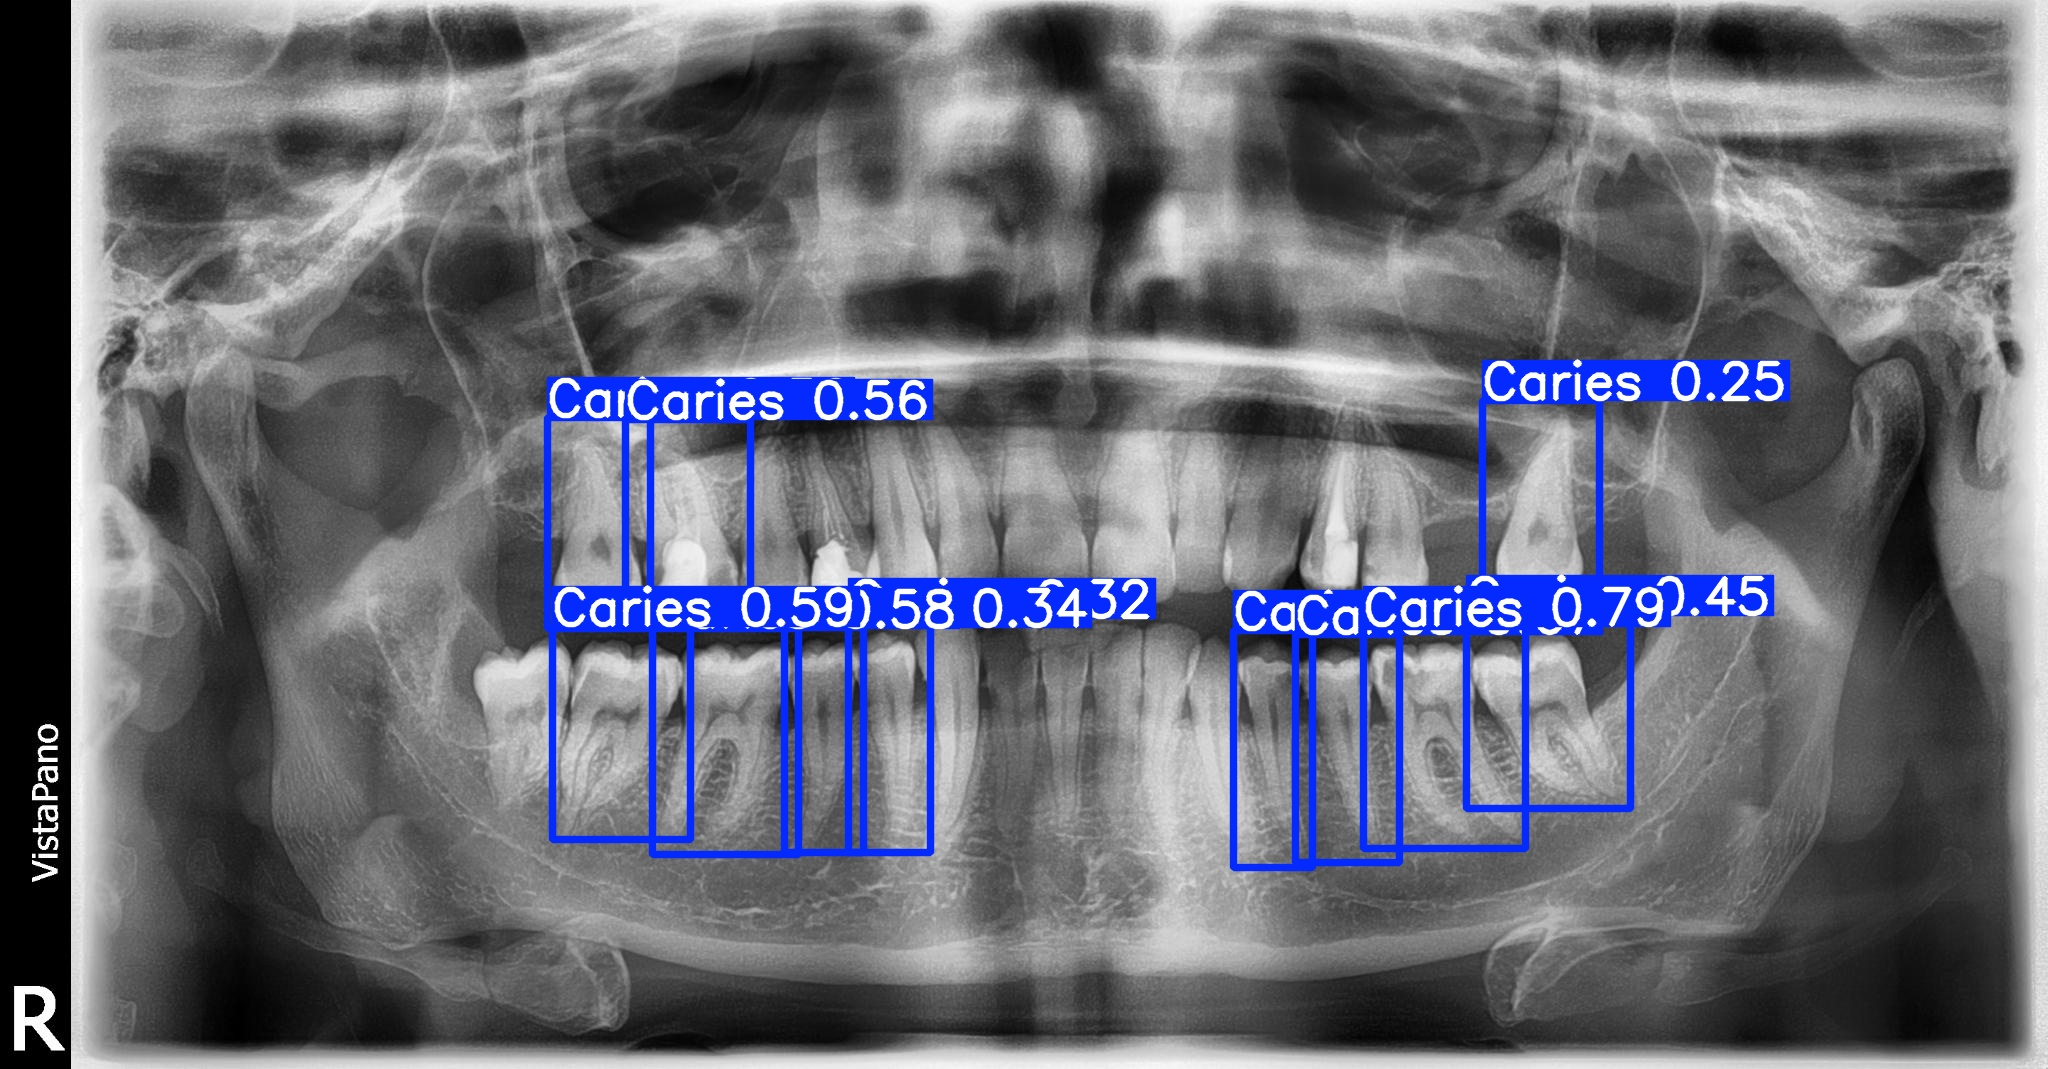

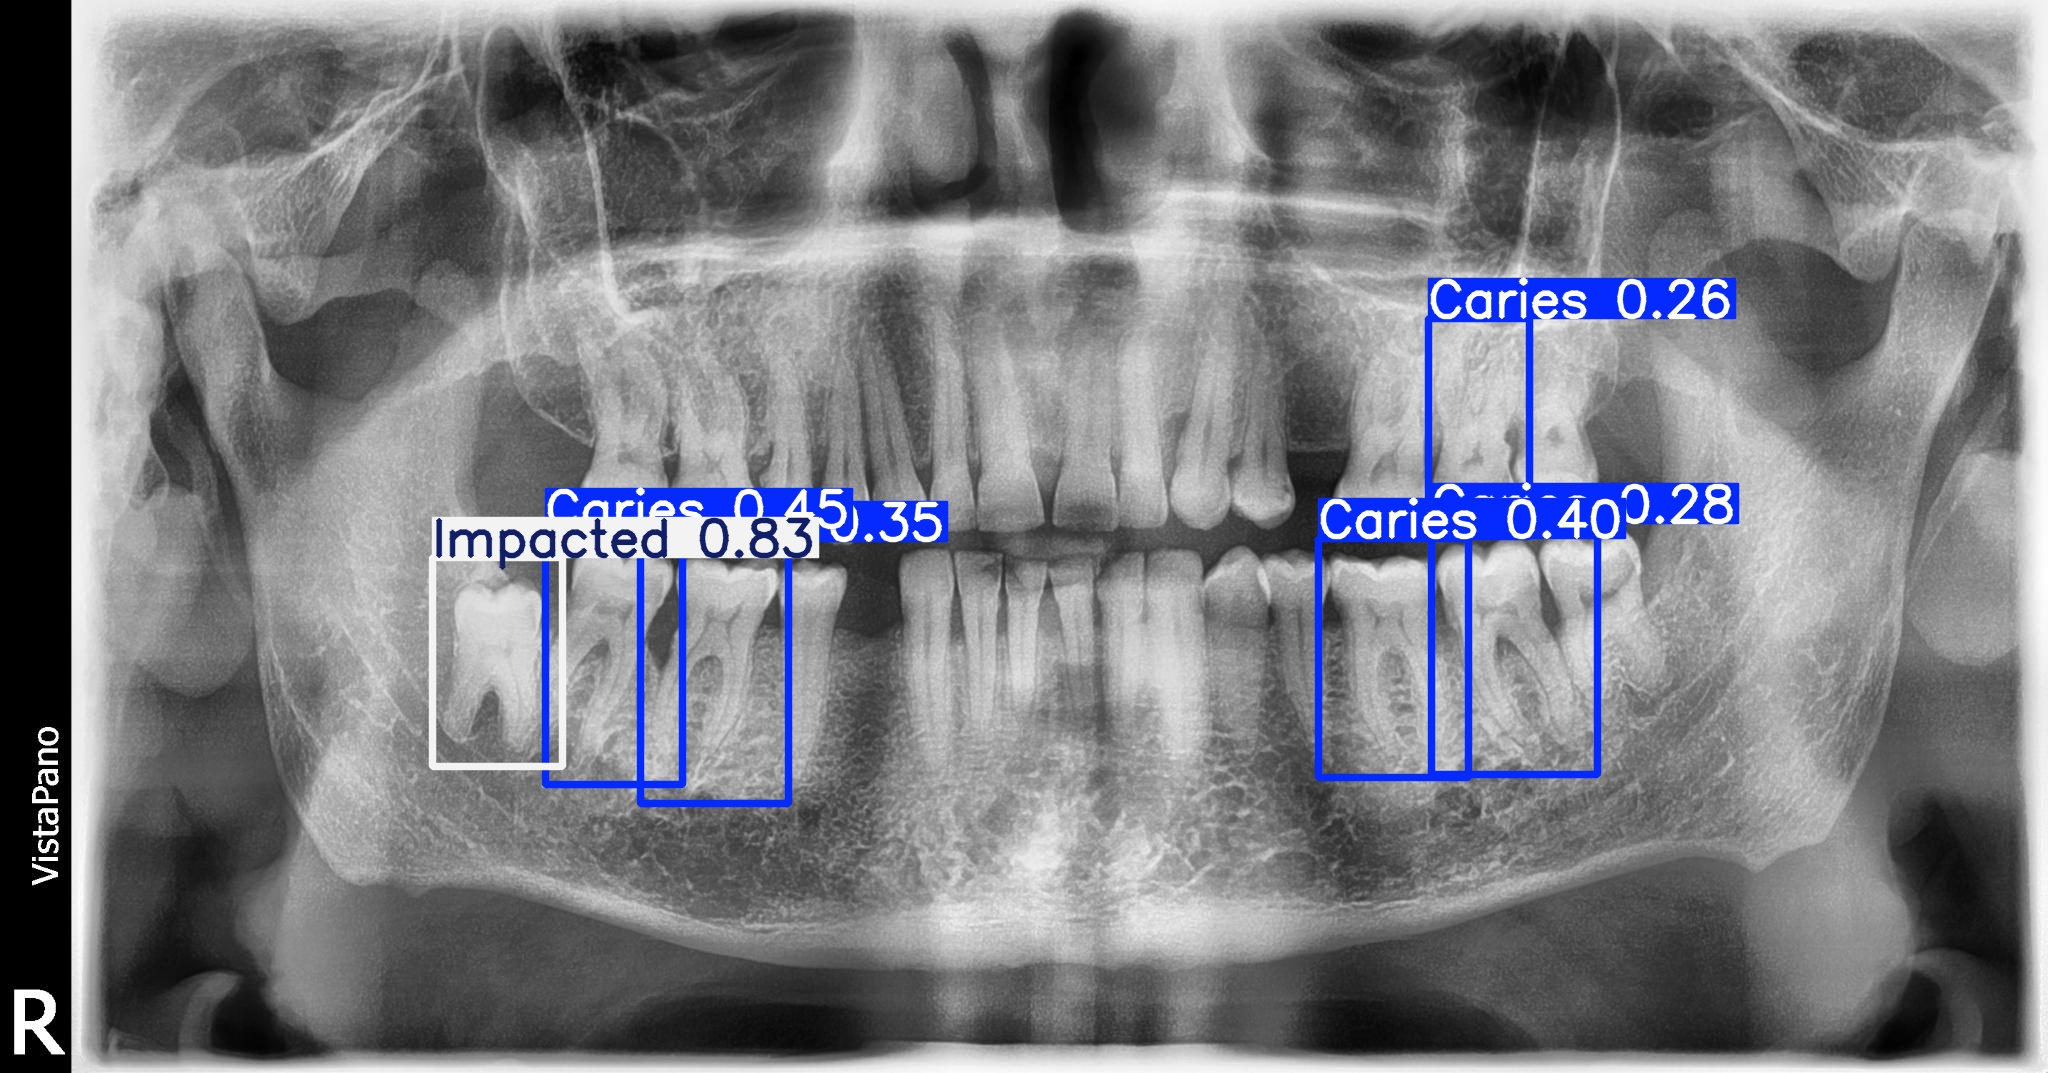

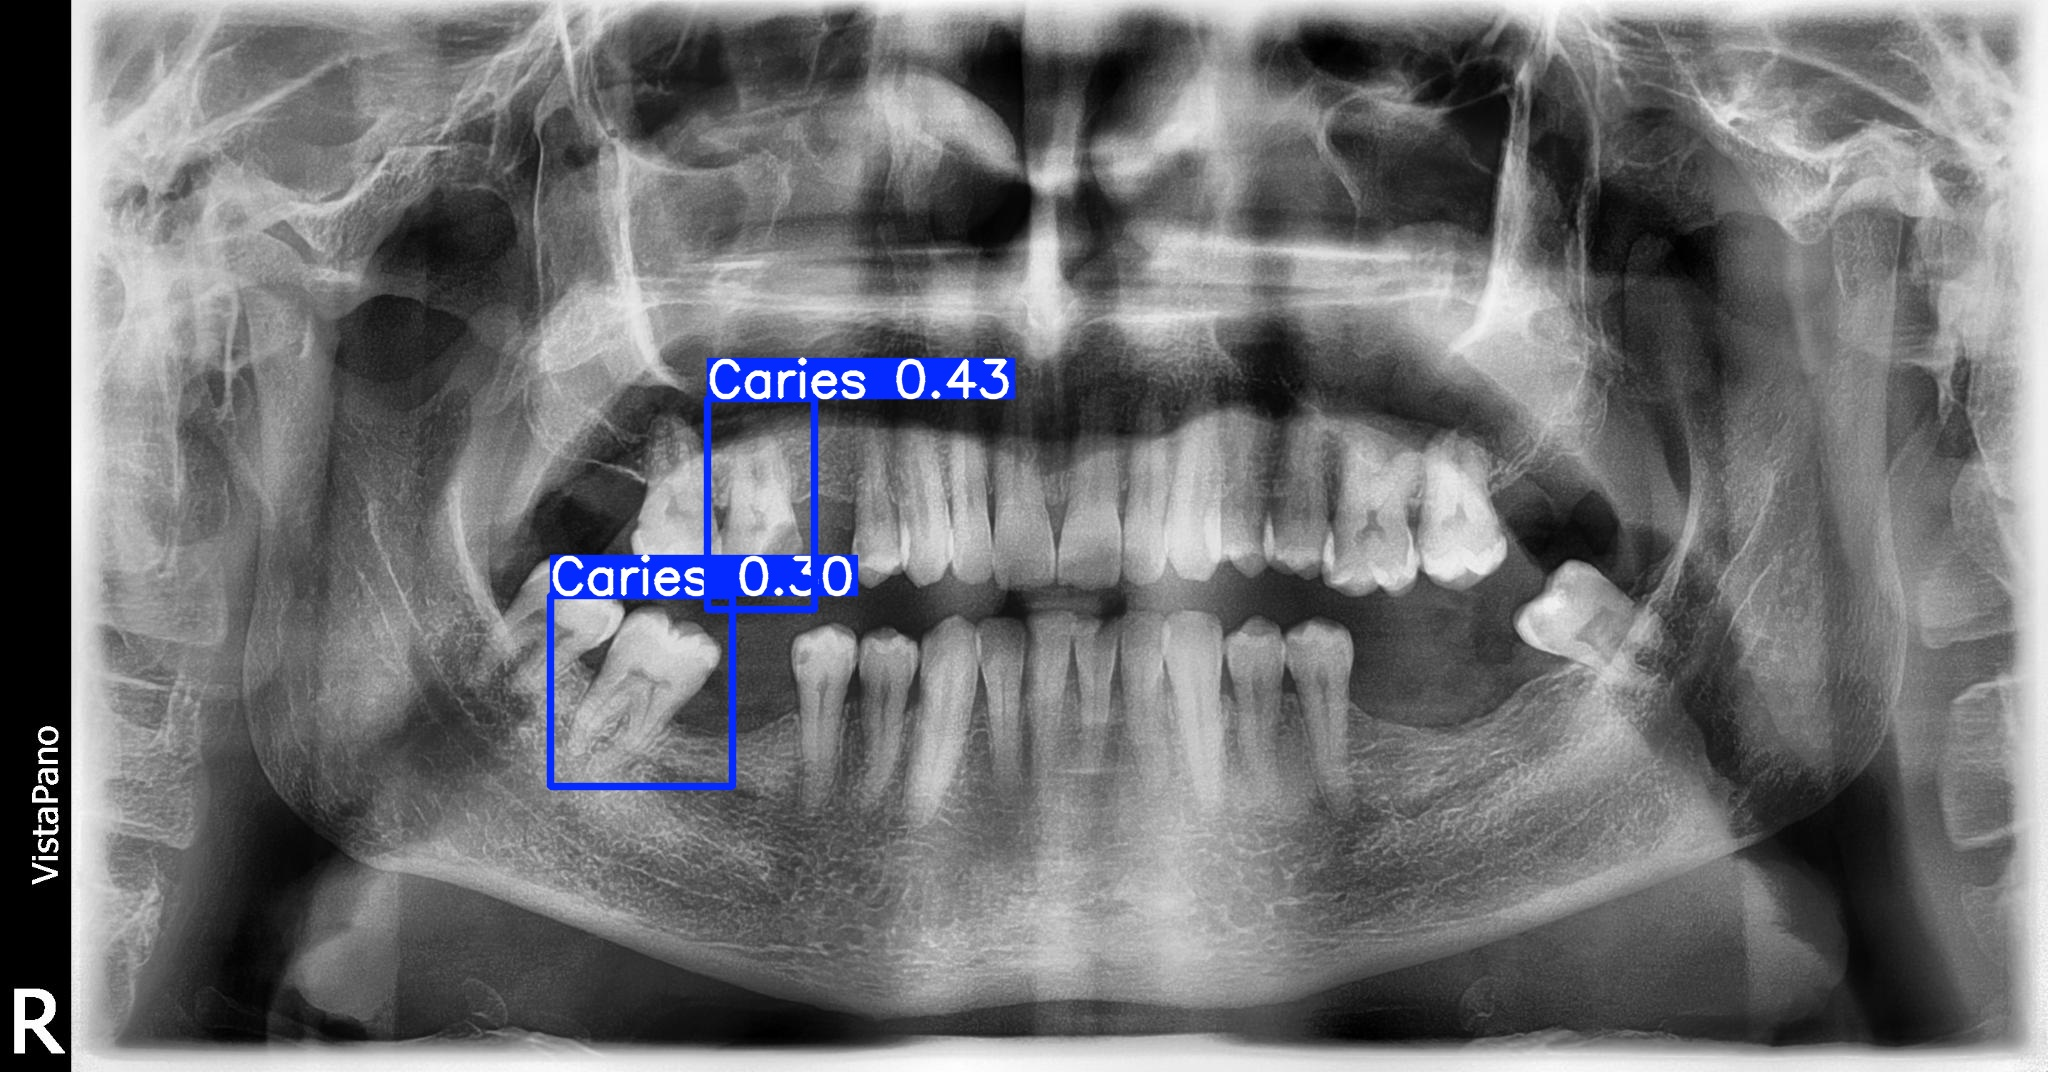

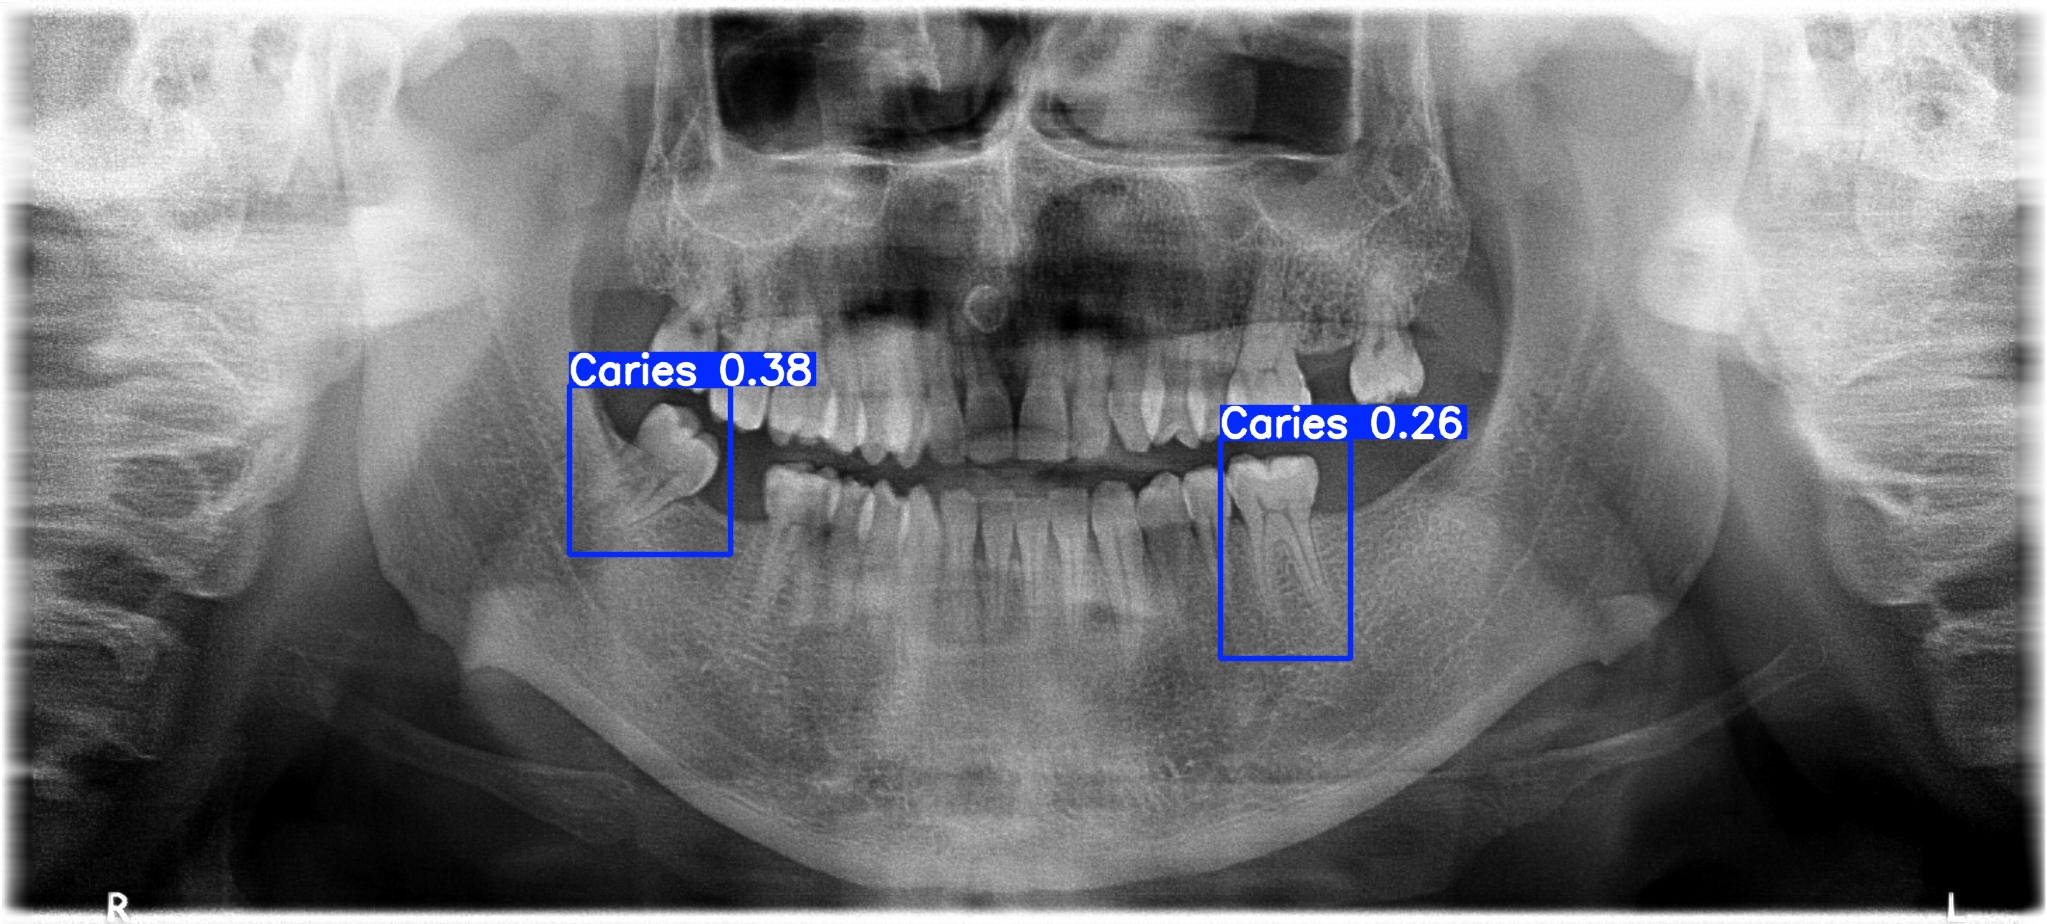

In [32]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{Home}/runs/detect/predict/*.jpg')[:8]:
  display(Image(filename = image_path, width=600))
  print("\n")